In [116]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import scipy.stats as st

In [117]:
df = pd.read_csv('records.csv')

In [118]:
def plot_t_days(time):
    for i in range(100):
        if df.iloc[i][1]==-1:
            plt.scatter(x[i], y[i], marker = "o", s = 50, edgecolors='black', facecolors='none')
        else:
            if time<df.iloc[i][1]:
                plt.scatter(x[i], y[i], marker = "o", s = 50, edgecolors='black', facecolors='none')
            elif df.iloc[i][1]<=time<df.iloc[i][2]:
                plt.scatter(x[i], y[i], marker = "o", s = 50, edgecolors='red', facecolors='red')
            else:
                plt.scatter(x[i], y[i], marker = "o", s = 50, edgecolors='blue', facecolors='blue')
    plt.show()

In [119]:
x = df["position_x"]
y = df["position_y"]

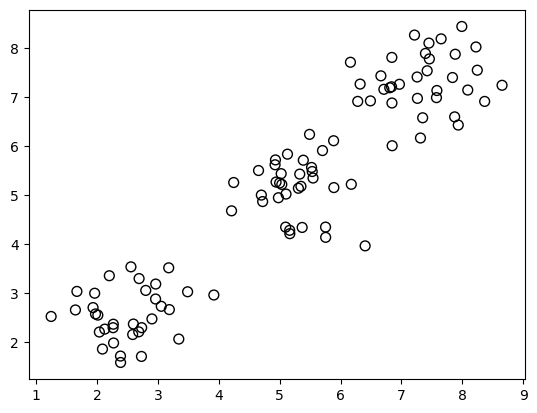

In [120]:
#Each individuals' location before the outbreak
plt.scatter(x, y, marker = "o", s = 50, edgecolors='black', facecolors='none')
plt.show()

In [121]:
'''
X = df[["position_x", "position_y"]].values
n_clusters = 3
# Initialize and fit the KMeans model
cluster = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
y_pred = cluster.labels_ 
X = df[["position_x", "position_y"]].values
n_clusters = 3
y_pred = df["cluster_id"]
'''

'\nX = df[["position_x", "position_y"]].values\nn_clusters = 3\n# Initialize and fit the KMeans model\ncluster = KMeans(n_clusters=n_clusters, random_state=0).fit(X)\ny_pred = cluster.labels_ \nX = df[["position_x", "position_y"]].values\nn_clusters = 3\ny_pred = df["cluster_id"]\n'

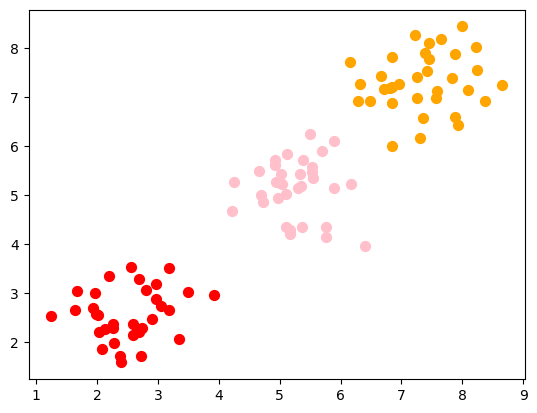

In [122]:
#centroid = cluster.cluster_centers_
color=['red','pink','orange','gray','yellow','purple']
fig, axi1=plt.subplots(1)
for i in range(n_clusters):
    axi1.scatter(X[y_pred==i, 0], X[y_pred==i, 1],
               marker='o',
               s=50,
               c=color[i])
#axi1.scatter(centroid[:,0],centroid[:,1],marker='x',s=100,c='black')

In [123]:
df["cluster_id"] = y_pred

In [124]:
df

,id,time_of_infected,time_of_removed,position_x,position_y,susceptibility level,infectivity level,cluster_id
0,0,2,5,3.48567,3.02299,0.41,1,0
1,1,1,4,2.01021,2.54665,0.65,1,0
2,2,1,4,2.68225,2.20533,0.31,1,0
3,3,2,5,3.18528,2.65925,0.41,1,0
4,4,1,4,1.64168,2.65176,0.19,1,0
...,...,...,...,...,...,...,...,...
95,95,9,12,6.83748,7.20553,0.25,1,2
96,96,8,11,6.32080,7.26106,0.67,1,2
97,97,9,12,7.57537,6.98480,0.58,1,2
98,98,10,13,8.65331,7.23660,0.57,1,2


In [125]:
df.to_csv("records.csv", index=False)

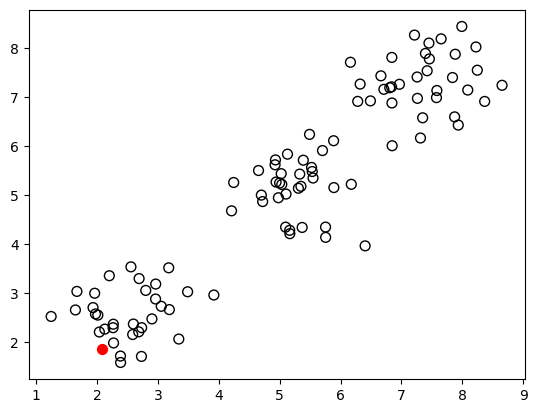

In [126]:
#t day after the outbreak
#compare with epiILM
#cran fortran 
plot_t_days(0)

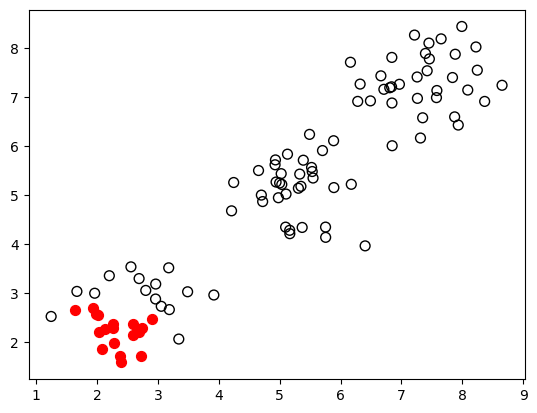

In [127]:
plot_t_days(1)

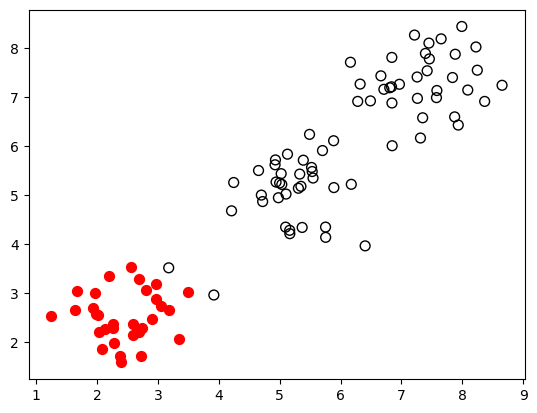

In [128]:
plot_t_days(2)

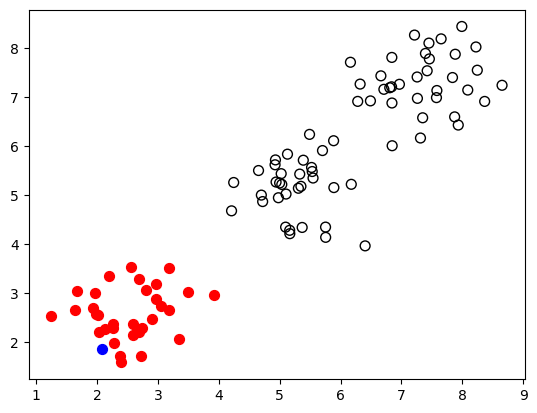

In [129]:
plot_t_days(3)

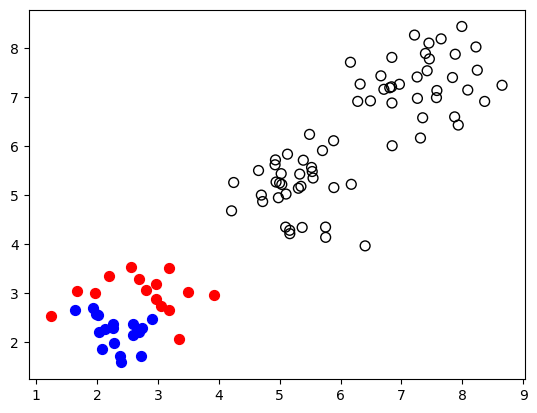

In [130]:
plot_t_days(4)

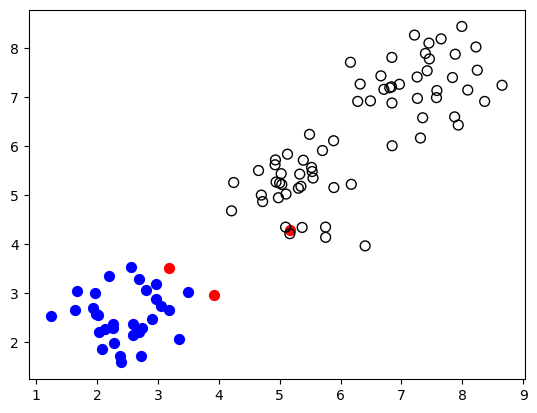

In [131]:
plot_t_days(5)

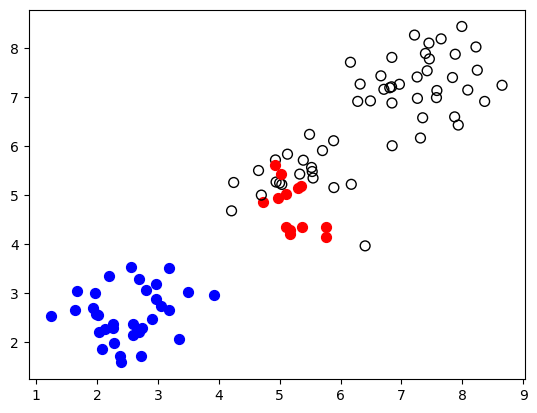

In [132]:
plot_t_days(6)

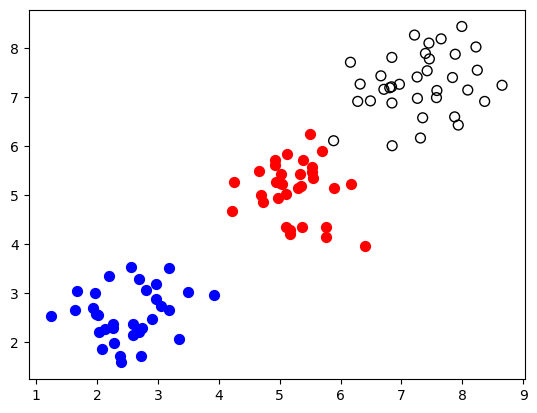

In [133]:
plot_t_days(7)

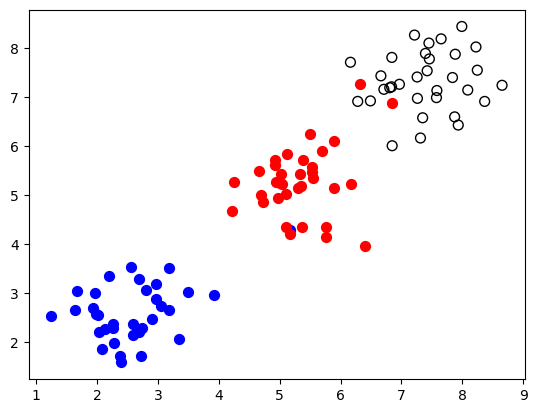

In [134]:
plot_t_days(8)

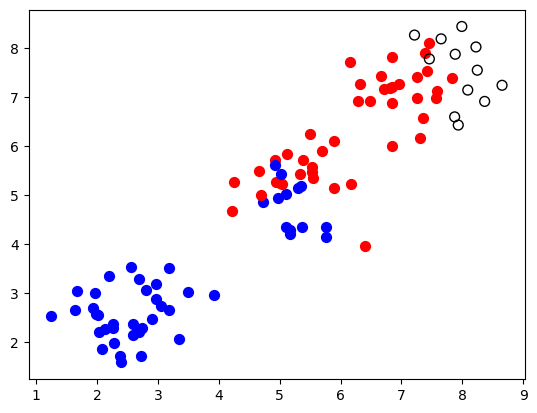

In [135]:
plot_t_days(9)

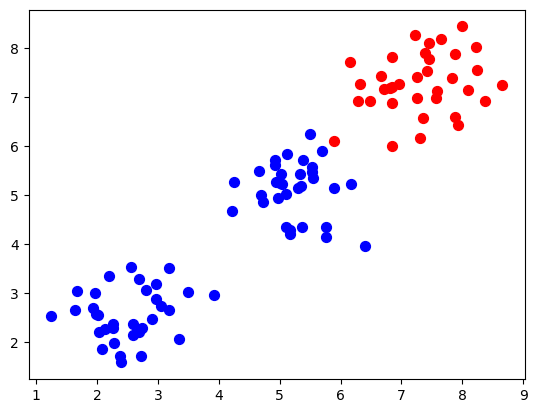

In [136]:
plot_t_days(10)

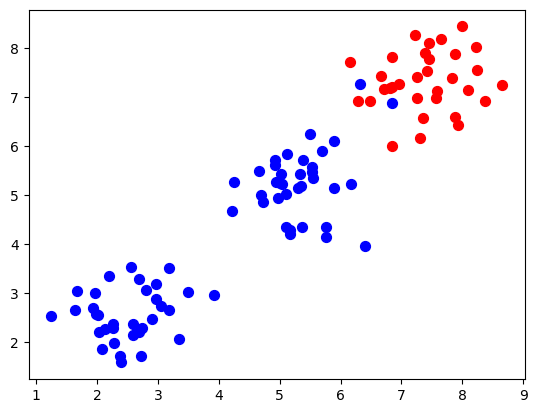

In [137]:
plot_t_days(11)

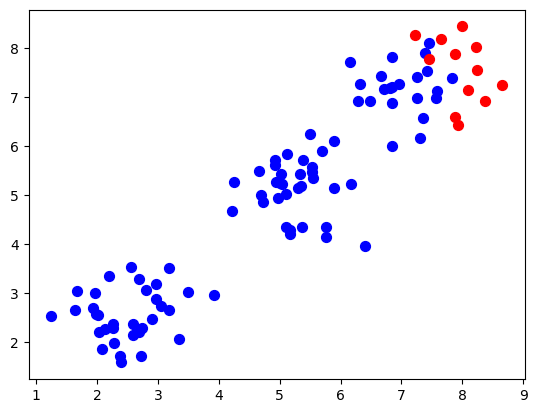

In [138]:
plot_t_days(12)

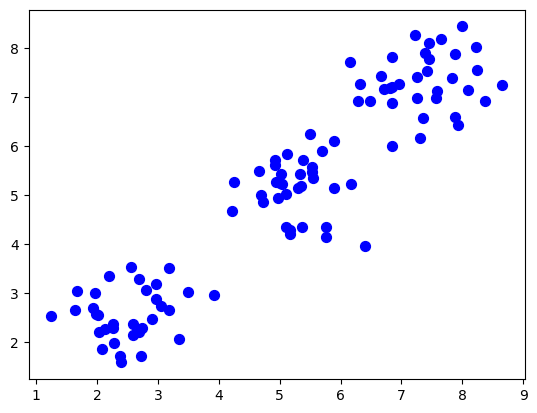

In [139]:
plot_t_days(13)

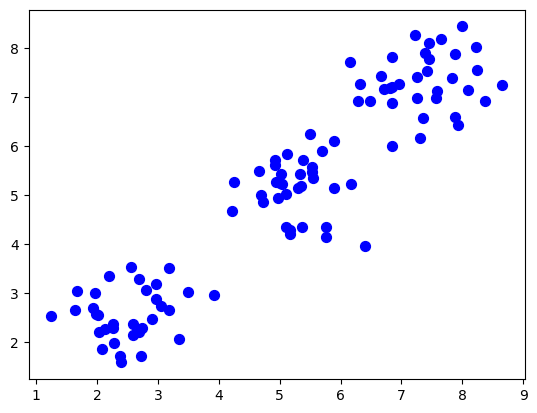

In [140]:
plot_t_days(14)

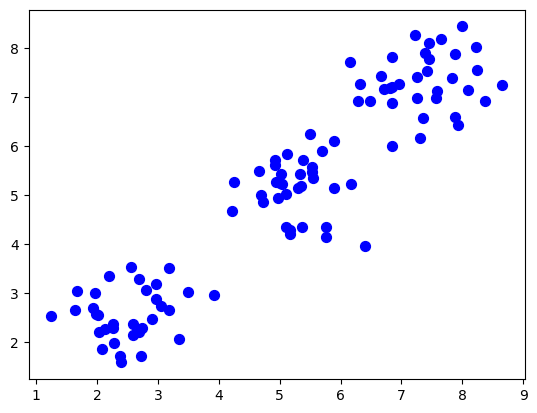

In [141]:
plot_t_days(15)

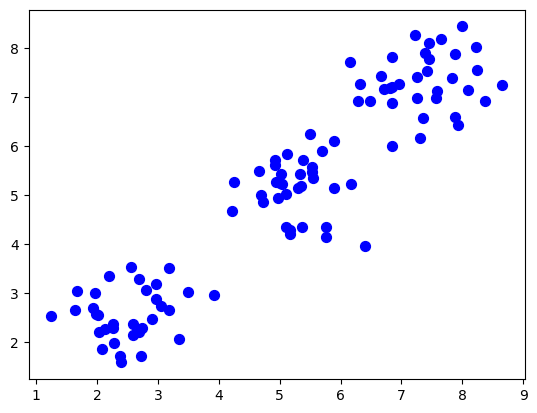

In [142]:
plot_t_days(16)

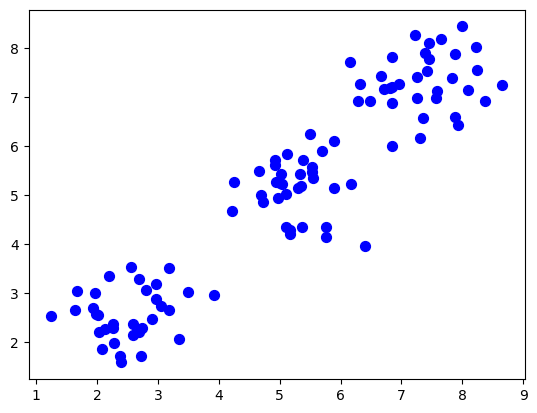

In [143]:
plot_t_days(17)

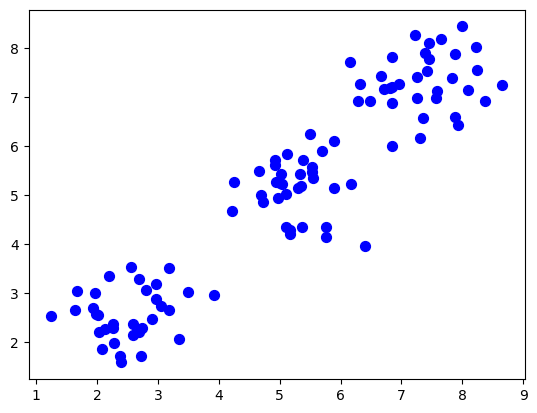

In [144]:
plot_t_days(18)

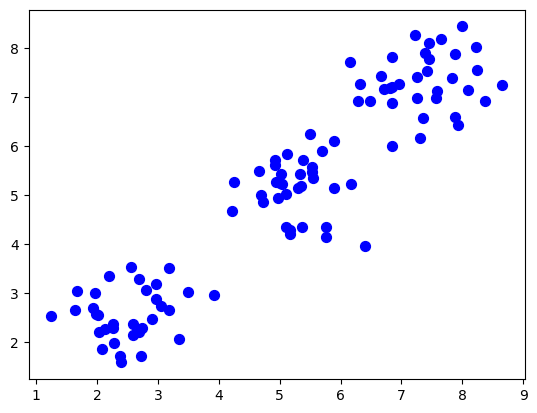

In [145]:
plot_t_days(19)

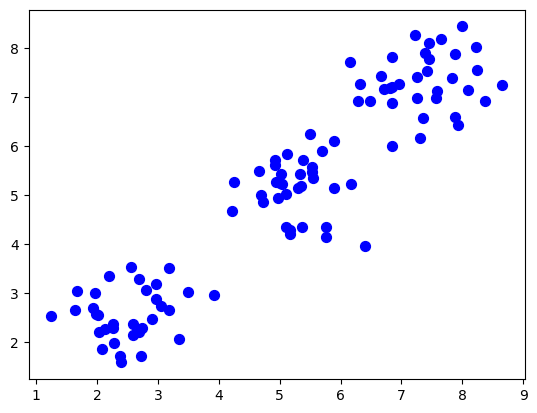

In [146]:
plot_t_days(20)

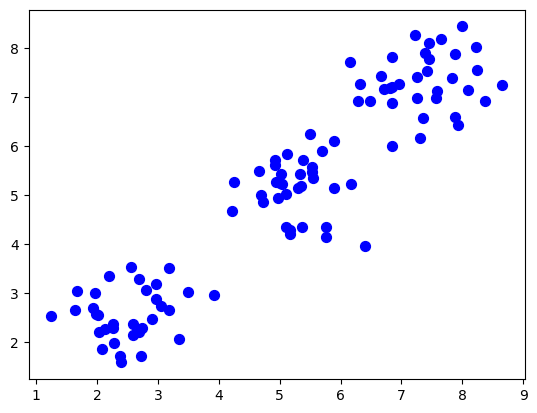

In [147]:
plot_t_days(21)

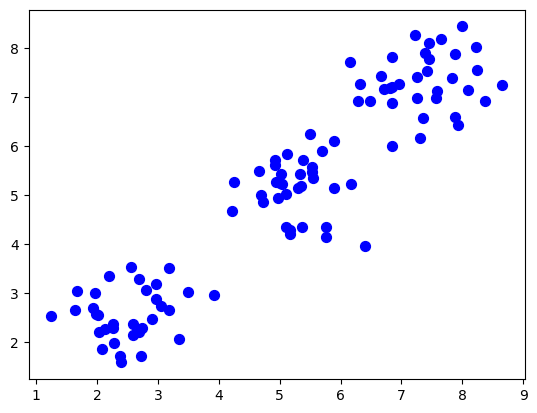

In [148]:
plot_t_days(22)

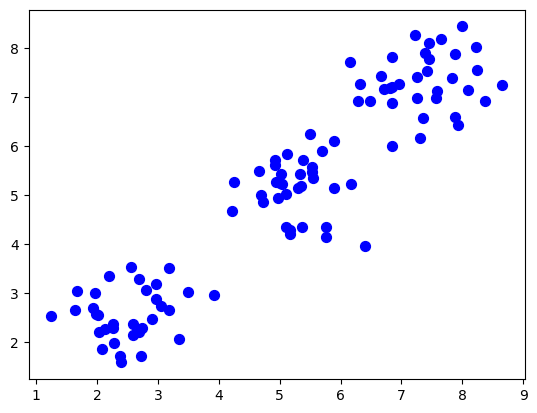

In [149]:
plot_t_days(23)

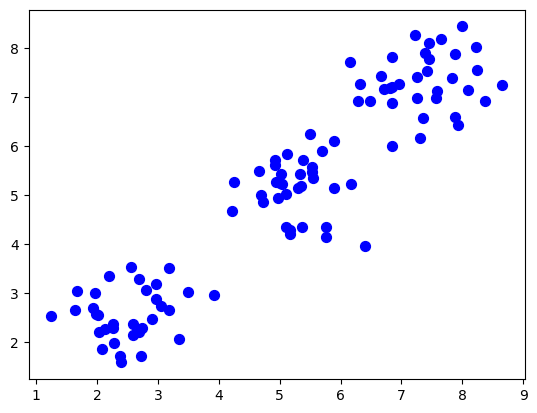

In [150]:
plot_t_days(24)

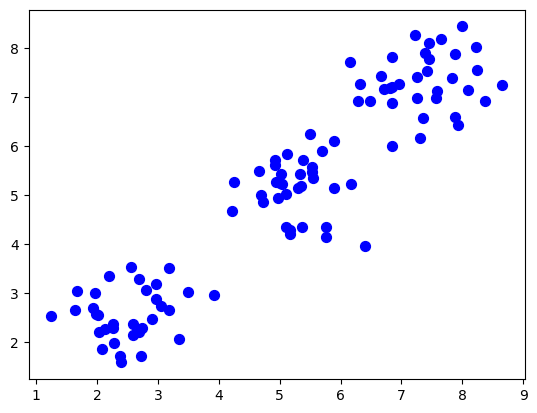

In [151]:
plot_t_days(25)

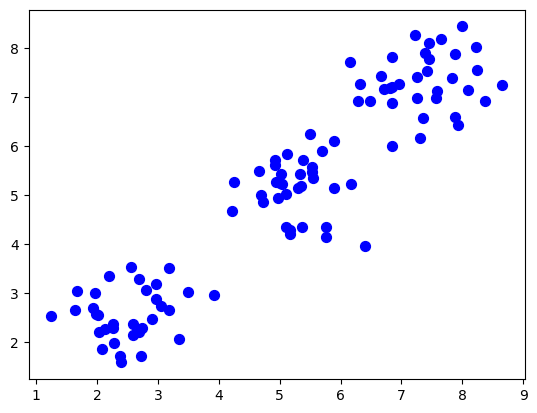

In [152]:
plot_t_days(26)

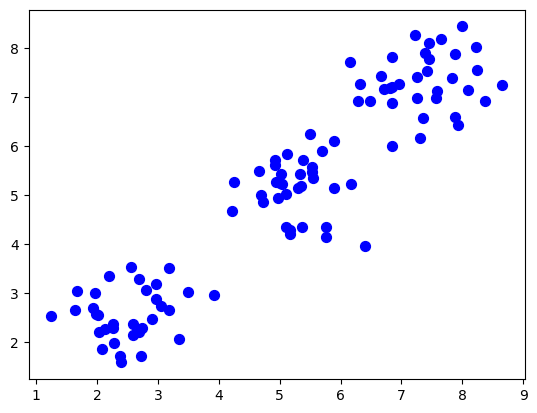

In [153]:
plot_t_days(27)

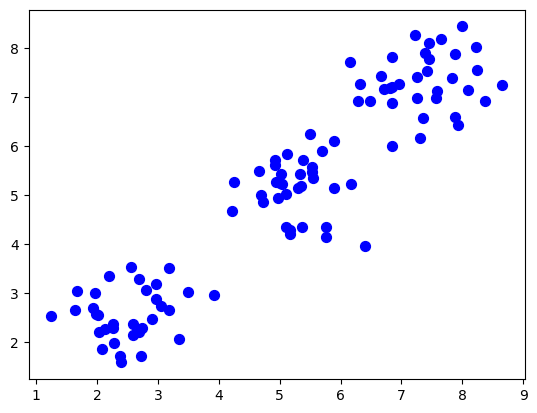

In [154]:
plot_t_days(28)

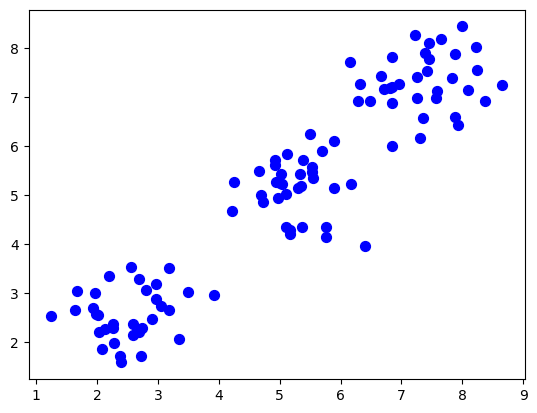

In [155]:
plot_t_days(29)

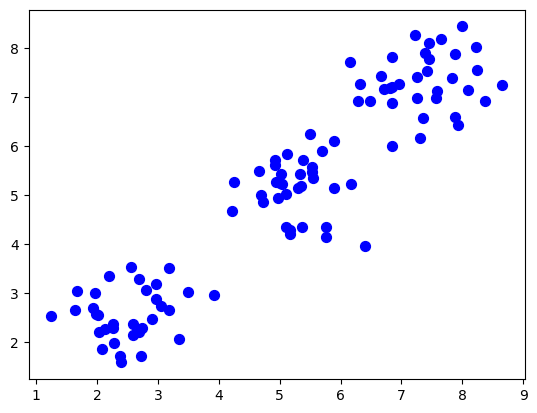

In [156]:
plot_t_days(30)

In [157]:
samples = pd.read_csv('samples.csv')
samples_HMC = pd.read_csv('samples_HMC.csv')

In [158]:
samples_a0 = pd.DataFrame(samples["a0"])
samples_a1 = pd.DataFrame(samples["a1"])
samples_beta = pd.DataFrame(samples["beta"])
samples_HMC_a0 = pd.DataFrame(samples_HMC["a0"])
samples_HMC_a1 = pd.DataFrame(samples_HMC["a1"])
samples_HMC_beta = pd.DataFrame(samples_HMC["beta"])

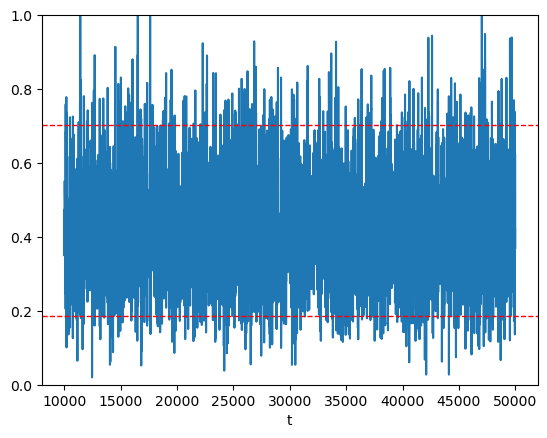

In [159]:
times = range(9999,50000)
plt.plot(times, samples_a0[9999:50000])
plt.ylim(0, 1)
plt.xlabel("t")
plt.ylabel("")
plt.axhline(samples_a0.quantile(0.025)[0],color = "red", linestyle = "--", linewidth = 1)                                                                                                                                                    
plt.axhline(samples_a0.quantile(0.975)[0],color = "red", linestyle = "--", linewidth = 1)  
plt.show()
#plt.savefig("mixturemodel_beta11")

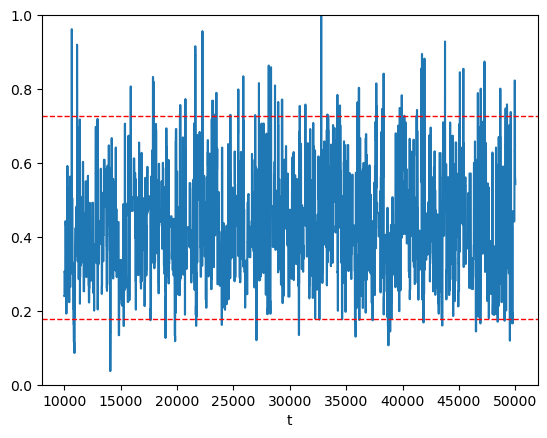

In [160]:
times = range(9999,50000)
plt.plot(times, samples_HMC_a0[9999:50000])
plt.ylim(0, 1)
plt.xlabel("t")
plt.ylabel("")
plt.axhline(samples_HMC_a0.quantile(0.025)[0],color = "red", linestyle = "--", linewidth = 1)                                                                                                                                                    
plt.axhline(samples_HMC_a0.quantile(0.975)[0],color = "red", linestyle = "--", linewidth = 1)  
plt.show()
#plt.savefig("mixturemodel_beta11")

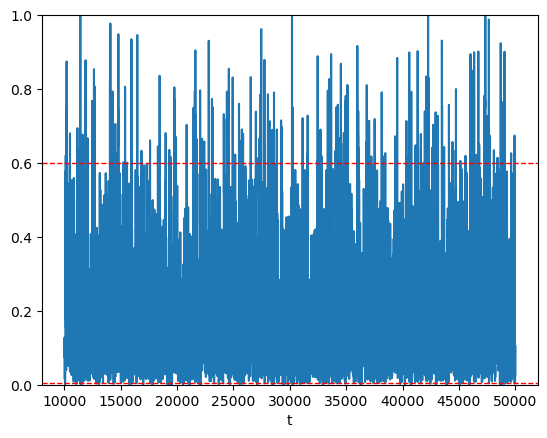

In [161]:
times = range(9999,50000)
plt.plot(times, samples_a1[9999:50000])
plt.ylim(0, 1)
plt.xlabel("t")
plt.ylabel("")
plt.axhline(samples_a1.quantile(0.025)[0],color = "red", linestyle = "--", linewidth = 1)                                                                                                                                                    
plt.axhline(samples_a1.quantile(0.975)[0],color = "red", linestyle = "--", linewidth = 1)  
plt.show()

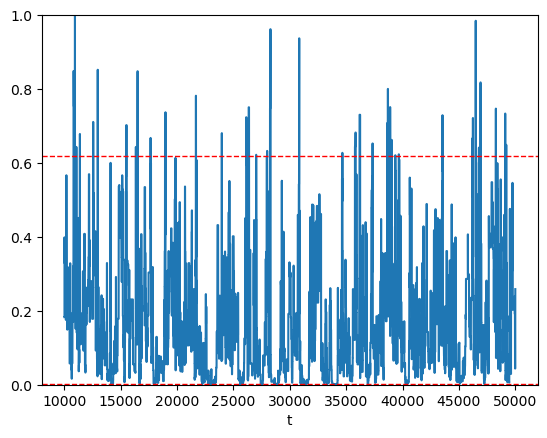

In [162]:
times = range(9999,50000)
plt.plot(times, samples_HMC_a1[9999:50000])
plt.ylim(0, 1)
plt.xlabel("t")
plt.ylabel("")
plt.axhline(samples_HMC_a1.quantile(0.025)[0],color = "red", linestyle = "--", linewidth = 1)                                                                                                                                                    
plt.axhline(samples_HMC_a1.quantile(0.975)[0],color = "red", linestyle = "--", linewidth = 1)  
plt.show()

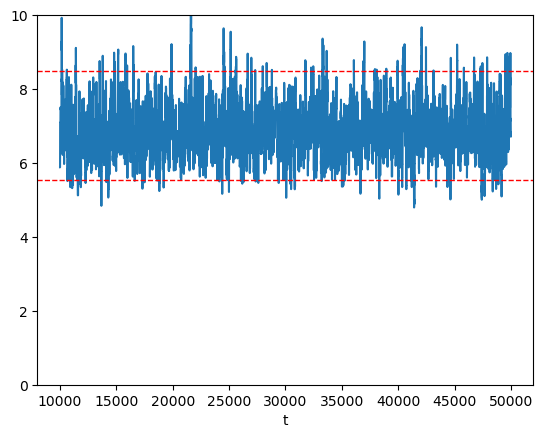

In [163]:
times = range(9999,50000)
plt.plot(times, samples_beta[9999:50000])
plt.ylim(0, 10)
plt.xlabel("t")
plt.ylabel("")
plt.axhline(samples_beta.quantile(0.025)[0],color = "red", linestyle = "--", linewidth = 1)                                                                                                                                                    
plt.axhline(samples_beta.quantile(0.975)[0],color = "red", linestyle = "--", linewidth = 1)  
plt.show()

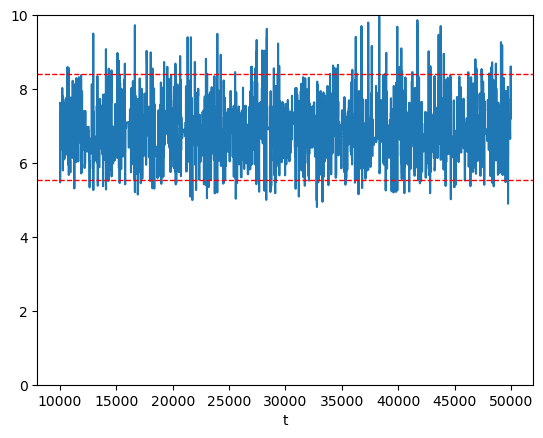

In [164]:
times = range(9999,50000)
plt.plot(times, samples_HMC_beta[9999:50000])
plt.ylim(0, 10)
plt.xlabel("t")
plt.ylabel("")
plt.axhline(samples_HMC_beta.quantile(0.025)[0],color = "red", linestyle = "--", linewidth = 1)                                                                                                                                                    
plt.axhline(samples_HMC_beta.quantile(0.975)[0],color = "red", linestyle = "--", linewidth = 1)  
plt.show()

In [165]:
print(np.mean(samples_a0[9999:50000]))
print(samples_a0.quantile(0.025)[0], samples_a0.quantile(0.975)[0])

a0    0.427282
dtype: float64
0.187271 0.701669


/Users/yiraozhang/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [166]:
print(np.mean(samples_HMC_a0[9999:50000]))
print(samples_HMC_a0.quantile(0.025)[0], samples_HMC_a0.quantile(0.975)[0])

a0    0.43277
dtype: float64
0.177743 0.727775


/Users/yiraozhang/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [167]:
print(np.mean(samples_a1[9999:50000]))
print(samples_a1.quantile(0.025)[0], samples_a1.quantile(0.975)[0])

a1    0.178914
dtype: float64
0.00589415 0.598729


/Users/yiraozhang/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [168]:
print(np.mean(samples_HMC_a1[9999:50000]))
print(samples_HMC_a1.quantile(0.025)[0], samples_HMC_a1.quantile(0.975)[0])

a1    0.169757
dtype: float64
0.00177993 0.619717


/Users/yiraozhang/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [169]:
print(np.mean(samples_beta[9999:50000]))
print(samples_beta.quantile(0.025)[0], samples_beta.quantile(0.975)[0])

beta    6.857672
dtype: float64
5.54075 8.485


/Users/yiraozhang/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [170]:
print(np.mean(samples_beta[9999:50000]))
print(samples_HMC_beta.quantile(0.025)[0], samples_HMC_beta.quantile(0.975)[0])

beta    6.857672
dtype: float64
5.54903 8.42021


/Users/yiraozhang/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
